In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("hdp_1.csv")

In [3]:
df.head()  ## first 5 collect part of the data 

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145.0,233.0,1.0,2.0,150.0,1.0,2.3,3.0,1.0,2.0,1
1,67,1,4,161.0,286.0,1.0,2.0,108.0,1.0,1.5,2.0,3.0,1.0,2
2,67,1,4,121.0,229.0,1.0,2.0,129.0,1.0,2.6,2.0,2.0,3.0,1
3,37,1,3,131.0,250.0,1.0,1.0,187.0,1.0,3.5,3.0,1.0,1.0,1
4,41,1,2,131.0,204.0,1.0,2.0,172.0,1.0,1.4,1.0,1.0,1.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1223 non-null   int64  
 1   sex       1223 non-null   int64  
 2   cp        1223 non-null   int64  
 3   trestbps  1164 non-null   float64
 4   chol      1193 non-null   float64
 5   fbs       1133 non-null   float64
 6   restecg   1221 non-null   float64
 7   thalch    1168 non-null   float64
 8   exang     1168 non-null   float64
 9   oldpeak   1161 non-null   float64
 10  slope     914 non-null    float64
 11  ca        612 non-null    float64
 12  thal      737 non-null    float64
 13  target    1223 non-null   int64  
dtypes: float64(10), int64(4)
memory usage: 133.9 KB


In [5]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

## Data_preprocessing 

In [6]:
df['trestbps'].isnull().mean()

0.0482420278004906

18.412276951563168
17.962292044594445


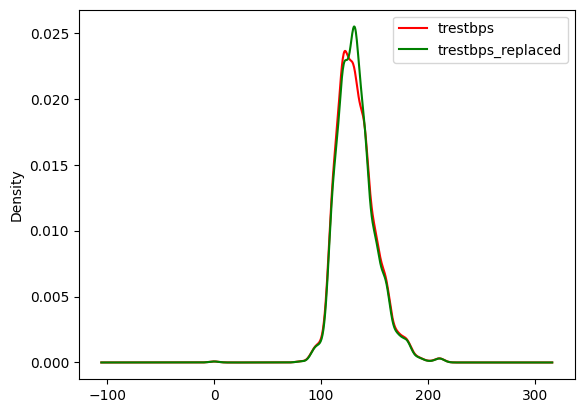

In [7]:
def fun(df):
    mean = df['trestbps'].mean()
    print(df['trestbps'].std())
    df['trestbps_replaced'] = df['trestbps'].fillna(mean)
    print(df['trestbps_replaced'].std())
    ## visualization technique
    df['trestbps'].plot(kind = 'kde' , color = 'r' , legend = 'trestbps')
    df['trestbps_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'trestbps_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    
    
    
fun(df)

## chekcing with median 

18.412276951563168
17.96675758641796


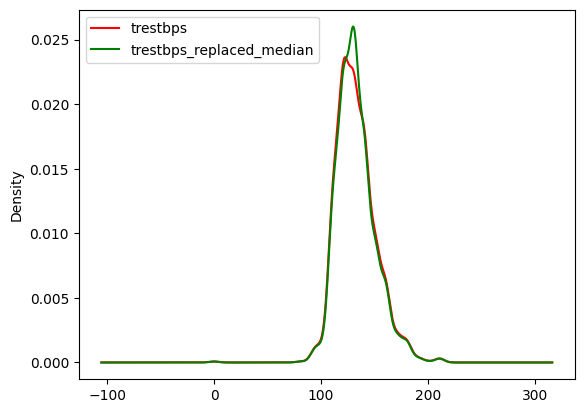

In [8]:
def fun(df):
    median = df['trestbps'].median()
    print(df['trestbps'].std())
    df['trestbps_replaced_median'] = df['trestbps'].fillna(median)
    print(df['trestbps_replaced_median'].std())
    ## visualization technique
    df['trestbps'].plot(kind = 'kde' , color = 'r' , legend = 'trestbps')
    df['trestbps_replaced_median'].plot(kind = 'kde' , color = 'green' , legend = 'trestbps_replaced_median')
    plt.legend(loc = 'best')
    plt.show()
    
    
    
    
fun(df)

## 3rd_technique()

In [9]:
df['trestbps'].dropna().sample(df['trestbps'].isnull().sum()  ,random_state = 10)

228     111.0
1183    108.0
560     138.0
325     131.0
843     111.0
573     145.0
1002    102.0
476     141.0
577     136.0
372     131.0
1146    120.0
1109    110.0
234     161.0
488     125.0
1041    138.0
795     171.0
1076    130.0
387     181.0
549     141.0
521     141.0
522     141.0
694     115.0
946     150.0
213     178.0
846     138.0
1173    100.0
745     131.0
728     121.0
532     121.0
341     111.0
529     111.0
683     125.0
429     131.0
960     140.0
752     161.0
1062    120.0
203     141.0
496     141.0
1192    120.0
852     112.0
27      151.0
404     111.0
43      151.0
963     130.0
827     124.0
808     158.0
818     122.0
970     130.0
1028    120.0
363     121.0
1106    130.0
579     141.0
705     145.0
1052    120.0
773     124.0
67      151.0
230     136.0
641     121.0
11      141.0
Name: trestbps, dtype: float64

## df['trestbps']

18.412276951563168
18.377353505652245


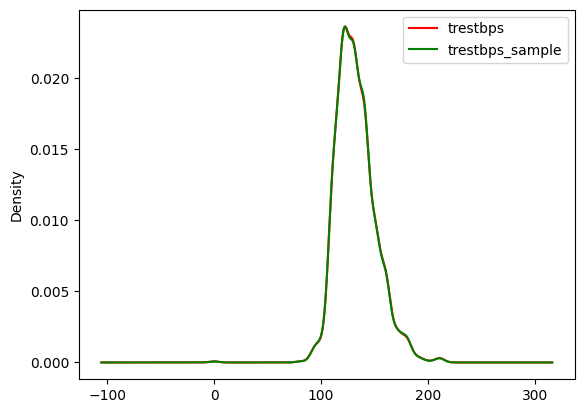

In [10]:
def fun1(df):
    df['trestbps_sample'] = df['trestbps']
    print(df['trestbps'].std())
    a = df['trestbps'].dropna().sample(df['trestbps'].isnull().sum()  ,random_state = 10)
    a.index = df[df['trestbps'].isnull()].index
    df.loc[df['trestbps'].isnull() , ['trestbps_sample']] = a
    print(df['trestbps_sample'].std())
    df['trestbps'].plot(kind = 'kde' , color = 'r' , legend = 'trestbps')
    df['trestbps_sample'].plot(kind = 'kde' , color = 'green' , legend = 'trestbps_sample')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target',
       'trestbps_replaced', 'trestbps_replaced_median', 'trestbps_sample'],
      dtype='object')

In [12]:
df = df.drop(['trestbps_replaced','trestbps','trestbps_replaced_median'],axis = 1)

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'trestbps_sample'],
      dtype='object')

## chol

101.26560169620238
101.21866796126338


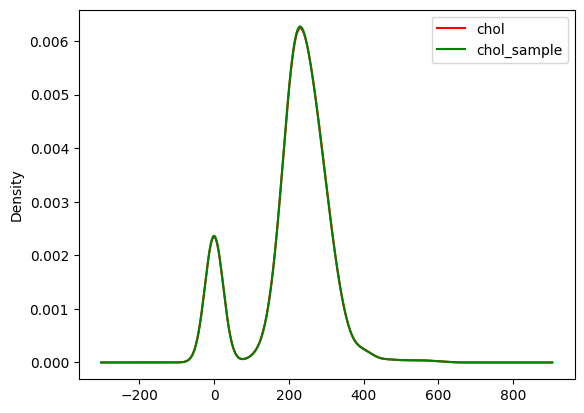

In [14]:
def fun1(df):
    df['chol_sample'] = df['chol']
    print(df['chol'].std())
    a = df['chol'].dropna().sample(df['chol'].isnull().sum()  ,random_state = 10)
    a.index = df[df['chol'].isnull()].index
    df.loc[df['chol'].isnull() , ['chol_sample']] = a
    print(df['chol_sample'].std())
    df['chol'].plot(kind = 'kde' , color = 'r' , legend = 'chol')
    df['chol_sample'].plot(kind = 'kde' , color = 'green' , legend = 'chol_sample')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'trestbps_sample',
       'chol_sample'],
      dtype='object')

In [16]:
df = df.drop(['chol'],axis = 1)

## fbs

0.4195422578677958
0.4187324529642662


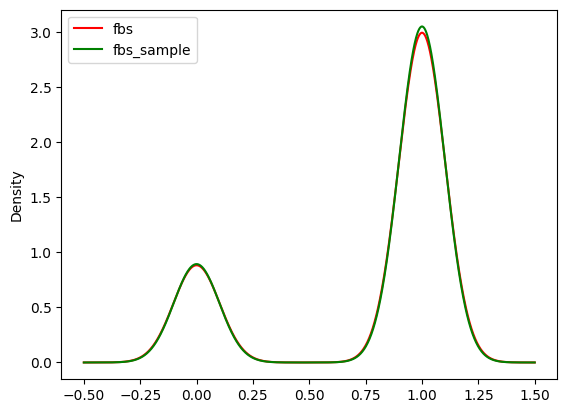

In [17]:
def fun1(df):
    df['fbs_sample'] = df['fbs']
    print(df['fbs'].std())
    a = df['fbs'].dropna().sample(df['fbs'].isnull().sum()  ,random_state = 10)
    a.index = df[df['fbs'].isnull()].index
    df.loc[df['fbs'].isnull() , ['fbs_sample']] = a
    print(df['fbs_sample'].std())
    df['fbs'].plot(kind = 'kde' , color = 'r' , legend = 'fbs')
    df['fbs_sample'].plot(kind = 'kde' , color = 'green' , legend = 'fbs_sample')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [18]:
df = df.drop(['fbs_sample'],axis = 1)

## restecg

0.5258416542666665
0.5254111657341988


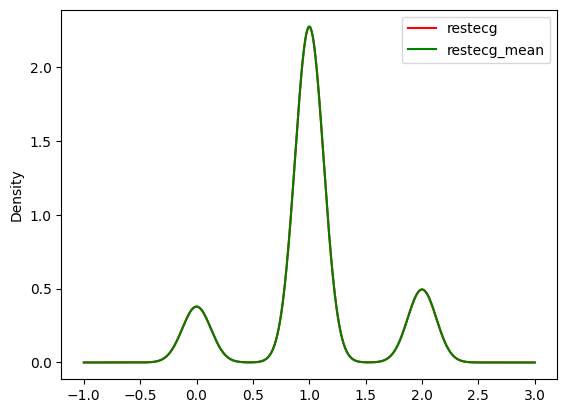

In [19]:
def fun(df):
    mean = df['restecg'].mean()
    print(df['restecg'].std())
    df['restecg_mean'] = df['restecg'].fillna(mean)
    print(df['restecg_mean'].std())
    ## visualization technique
    df['restecg'].plot(kind = 'kde' , color = 'r' , legend = 'restecg')
    df['restecg_mean'].plot(kind = 'kde' , color = 'green' , legend = 'restecg_sample')
    plt.legend(loc = 'best')
    plt.show()
    
    
    
    
fun(df)

In [20]:
df = df.drop(['restecg'] , axis = 1)

## thalch

25.721134098770296
25.940194240634447


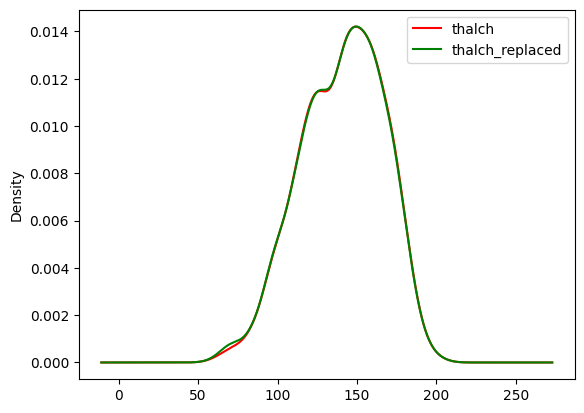

In [21]:
def fun1(df):
    df['thalch_replaced'] = df['thalch']
    print(df['thalch'].std())
    a = df['thalch'].dropna().sample(df['thalch'].isnull().sum()  ,random_state = 10)
    a.index = df[df['thalch'].isnull()].index
    df.loc[df['thalch'].isnull() , ['thalch_replaced']] = a
    print(df['thalch_replaced'].std())
    df['thalch'].plot(kind = 'kde' , color = 'r' , legend = 'thalch')
    df['thalch_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'thalch_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [22]:
df = df.drop(['thalch'],axis = 1)

## exang

0.37983654877077017
0.38149845139912786


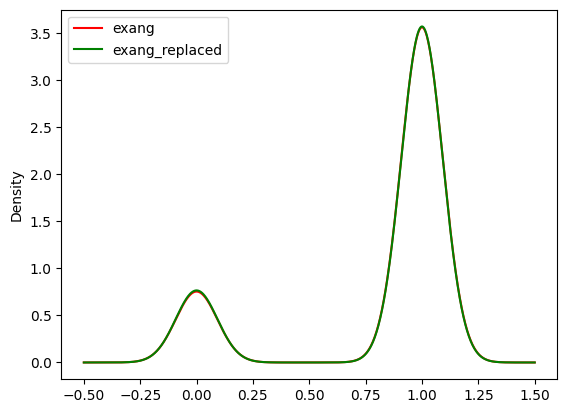

In [23]:
def fun1(df):
    df['exang_replaced'] = df['exang']
    print(df['exang'].std())
    a = df['exang'].dropna().sample(df['exang'].isnull().sum()  ,random_state = 10)
    a.index = df[df['exang'].isnull()].index
    df.loc[df['exang'].isnull() , ['exang_replaced']] = a
    print(df['exang_replaced'].std())
    df['exang'].plot(kind = 'kde' , color = 'r' , legend = 'exang')
    df['exang_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'exang_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [24]:
df = df.drop(['exang'],axis = 1)

## oldpeak

1.1116195597775358
1.1078550994330867


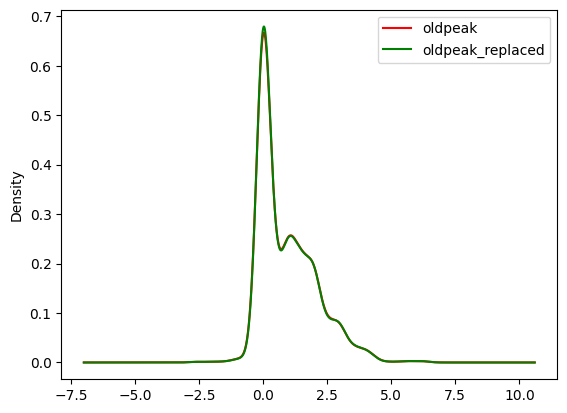

In [25]:
def fun1(df):
    df['oldpeak_replaced'] = df['oldpeak']
    print(df['oldpeak'].std())
    a = df['oldpeak'].dropna().sample(df['oldpeak'].isnull().sum()  ,random_state = 10)
    a.index = df[df['oldpeak'].isnull()].index
    df.loc[df['oldpeak'].isnull() , ['oldpeak_replaced']] = a
    print(df['oldpeak_replaced'].std())
    df['oldpeak'].plot(kind = 'kde' , color = 'r' , legend = 'oldpeak')
    df['oldpeak_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'oldpeak_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [26]:
df = df.drop(['oldpeak'],axis = 1)

## slope 

0.6422170108284939
0.6373453867546984


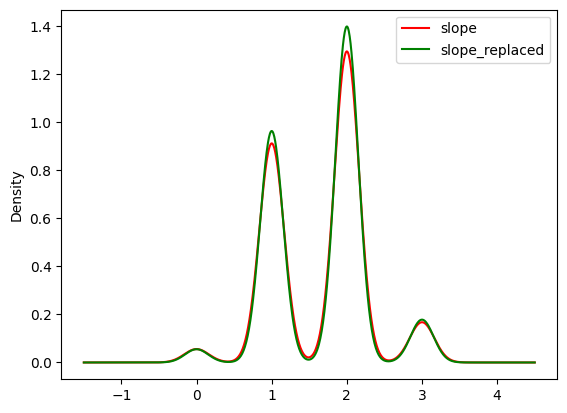

In [27]:
def fun1(df):
    df['slope_replaced'] = df['slope']
    print(df['slope'].std())
    a = df['slope'].dropna().sample(df['slope'].isnull().sum()  ,random_state = 10)
    a.index = df[df['slope'].isnull()].index
    df.loc[df['slope'].isnull() , ['slope_replaced']] = a
    print(df['slope_replaced'].std())
    df['slope'].plot(kind = 'kde' , color = 'r' , legend = 'slope')
    df['slope_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'slope_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [28]:
df = df.drop(['slope'] , axis = 1)

## ca

0.866732266403716
0.8667322651422779


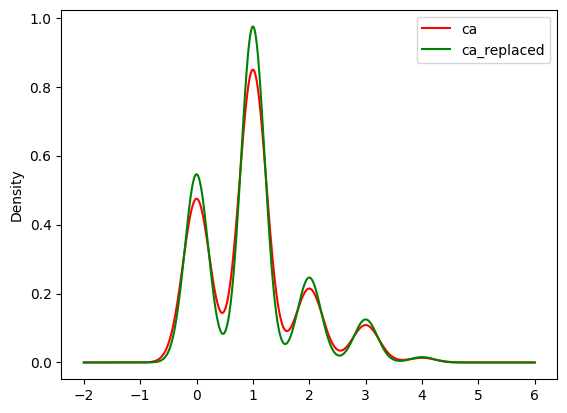

In [29]:
def fun1(df):
    df['ca_replaced'] = df['ca']
    print(df['ca'].std())
    a = df['ca'].dropna().sample(df['ca'].isnull().sum()  ,random_state = 10)
    a.index = df[df['ca'].isnull()].index
    df.loc[df['ca'].isnull() , ['ca_replaced']] = a
    print(df['ca_replaced'].std())
    df['ca'].plot(kind = 'kde' , color = 'r' , legend = 'ca')
    df['ca_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'ca_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [30]:
df = df.drop(['ca'],axis = 1)

## thal

0.8403576391008689
0.8430923877527423


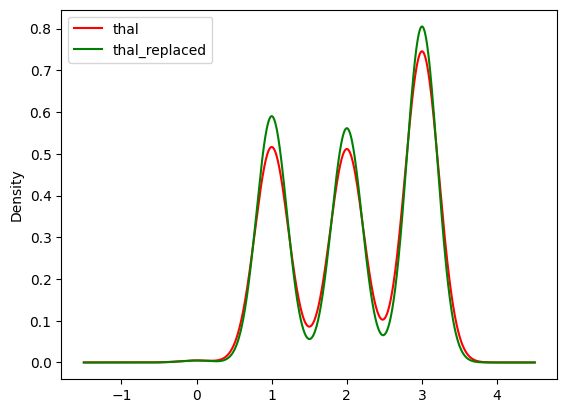

In [31]:
def fun1(df):
    df['thal_replaced'] = df['thal']
    print(df['thal'].std())
    a = df['thal'].dropna().sample(df['thal'].isnull().sum()  ,random_state = 10)
    a.index = df[df['thal'].isnull()].index
    df.loc[df['thal'].isnull() , ['thal_replaced']] = a
    print(df['thal_replaced'].std())
    df['thal'].plot(kind = 'kde' , color = 'r' , legend = 'thal')
    df['thal_replaced'].plot(kind = 'kde' , color = 'green' , legend = 'thal_replaced')
    plt.legend(loc = 'best')
    plt.show()
    
    




fun1(df)

In [32]:
df = df.drop(['thal'],axis = 1)

In [33]:
df = df.drop(['fbs'] , axis = 1)

In [34]:
df.columns

Index(['age', 'sex', 'cp', 'target', 'trestbps_sample', 'chol_sample',
       'restecg_mean', 'thalch_replaced', 'exang_replaced', 'oldpeak_replaced',
       'slope_replaced', 'ca_replaced', 'thal_replaced'],
      dtype='object')

In [35]:
df.isnull().sum()

age                 0
sex                 0
cp                  0
target              0
trestbps_sample     0
chol_sample         0
restecg_mean        0
thalch_replaced     0
exang_replaced      0
oldpeak_replaced    0
slope_replaced      0
ca_replaced         0
thal_replaced       0
dtype: int64

In [36]:
df.describe()

,age,sex,cp,target,trestbps_sample,chol_sample,restecg_mean,thalch_replaced,exang_replaced,oldpeak_replaced,slope_replaced,ca_replaced,thal_replaced
count,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000,1223.000000
mean,53.786590,0.921504,2.684383,1.219951,132.842191,210.834015,1.036855,140.402289,0.823385,0.916599,1.654947,0.998365,2.104661
std,9.349519,0.269060,1.373758,0.842718,18.377354,101.218668,0.525411,25.940194,0.381498,1.107855,0.637345,0.866732,0.843092
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,2.000000,1.000000,121.000000,192.500000,1.000000,122.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,1.000000,3.000000,1.000000,131.000000,229.000000,1.000000,142.000000,1.000000,0.600000,2.000000,1.000000,2.000000
75%,61.000000,1.000000,4.000000,1.000000,141.000000,269.000000,1.000000,160.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,4.000000,211.000000,603.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,3.000000


In [37]:
import warnings 
warnings.filterwarnings('ignore')

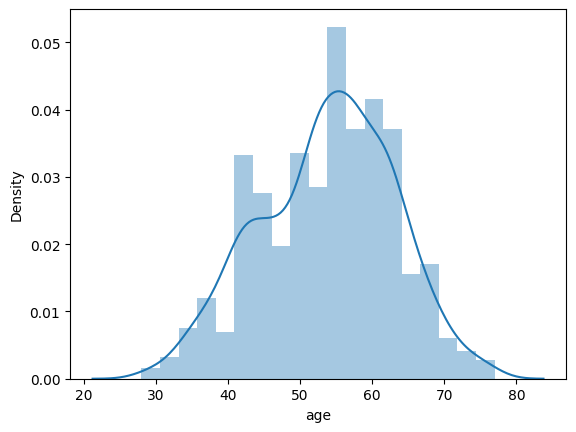

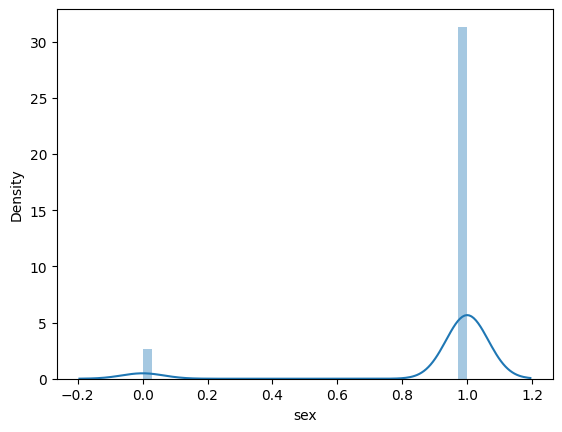

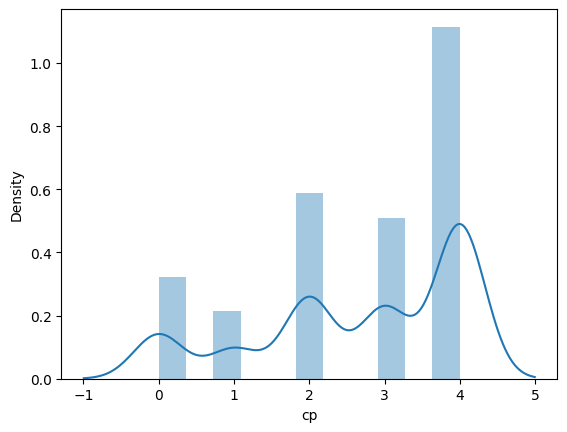

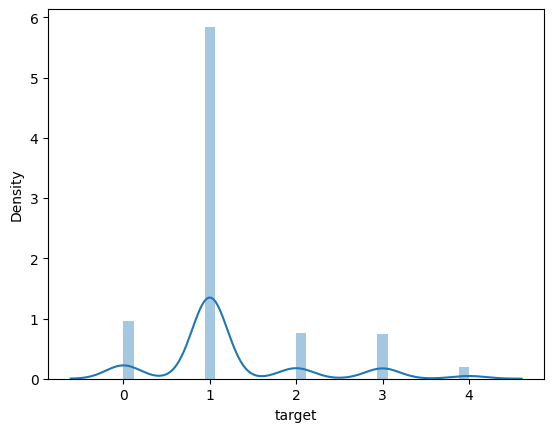

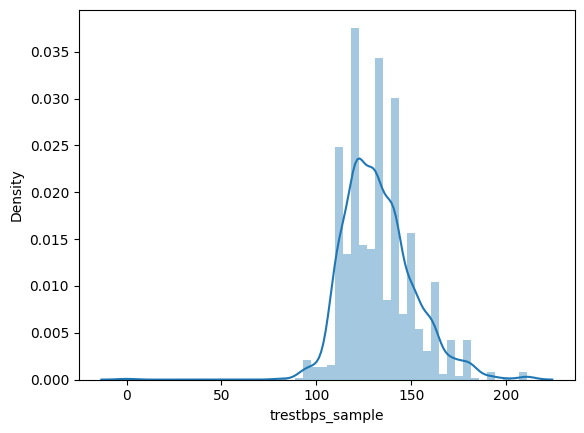

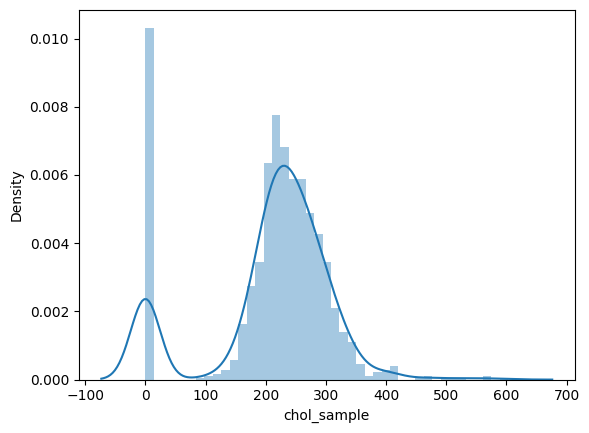

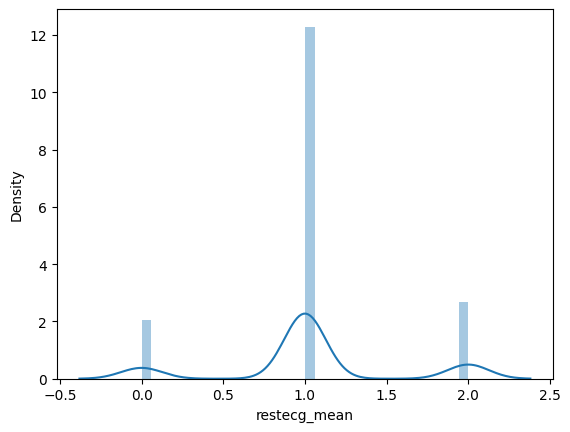

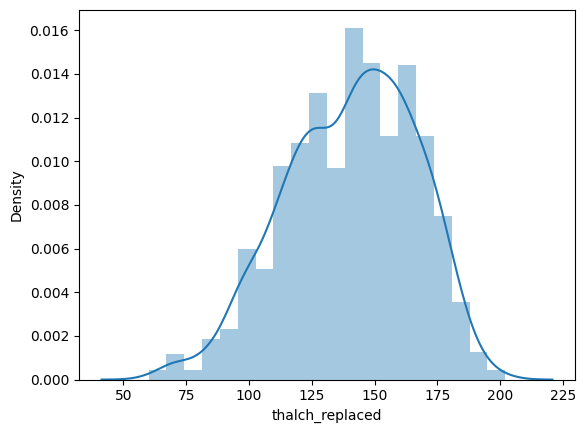

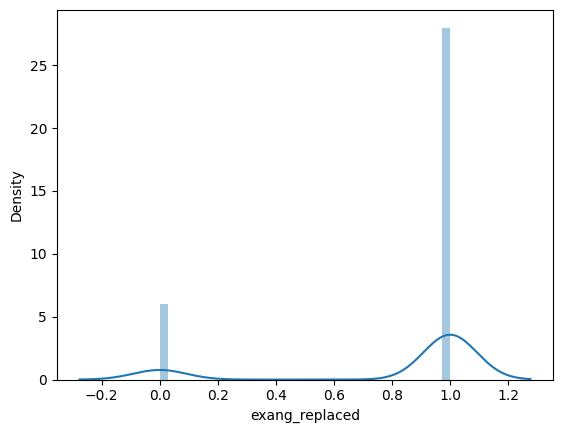

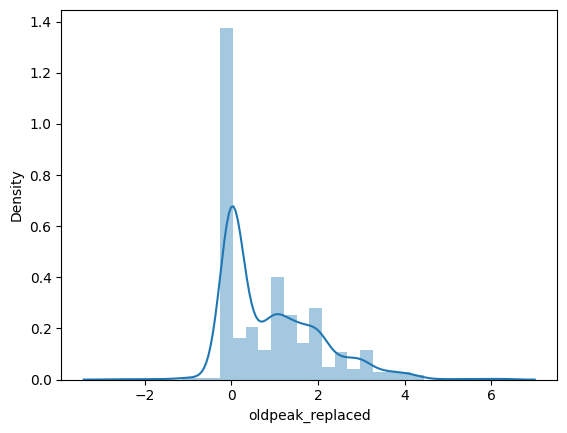

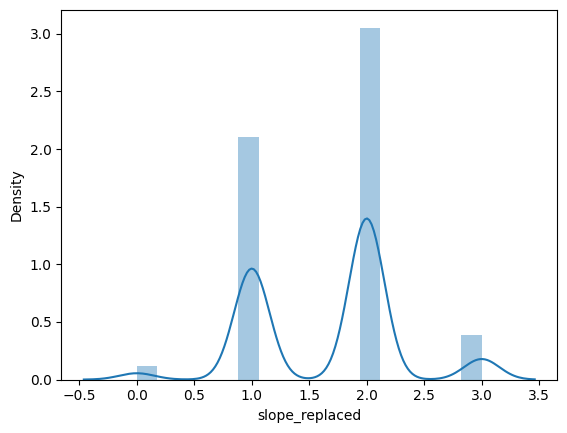

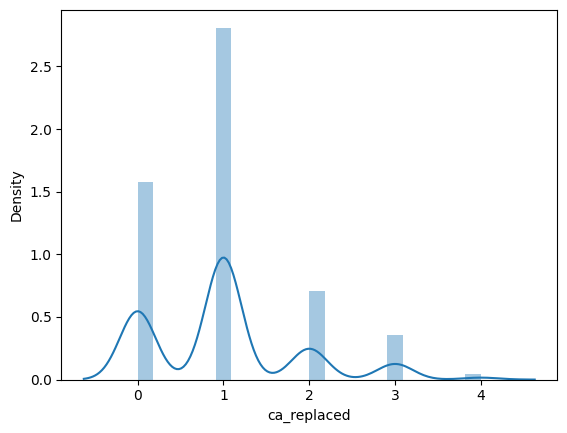

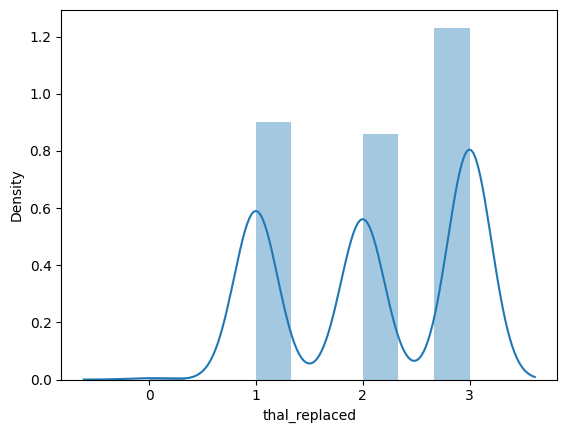

In [38]:
import seaborn as sns
a = df.columns
for i in a:
    sns.distplot(a = df[i])
    plt.show()

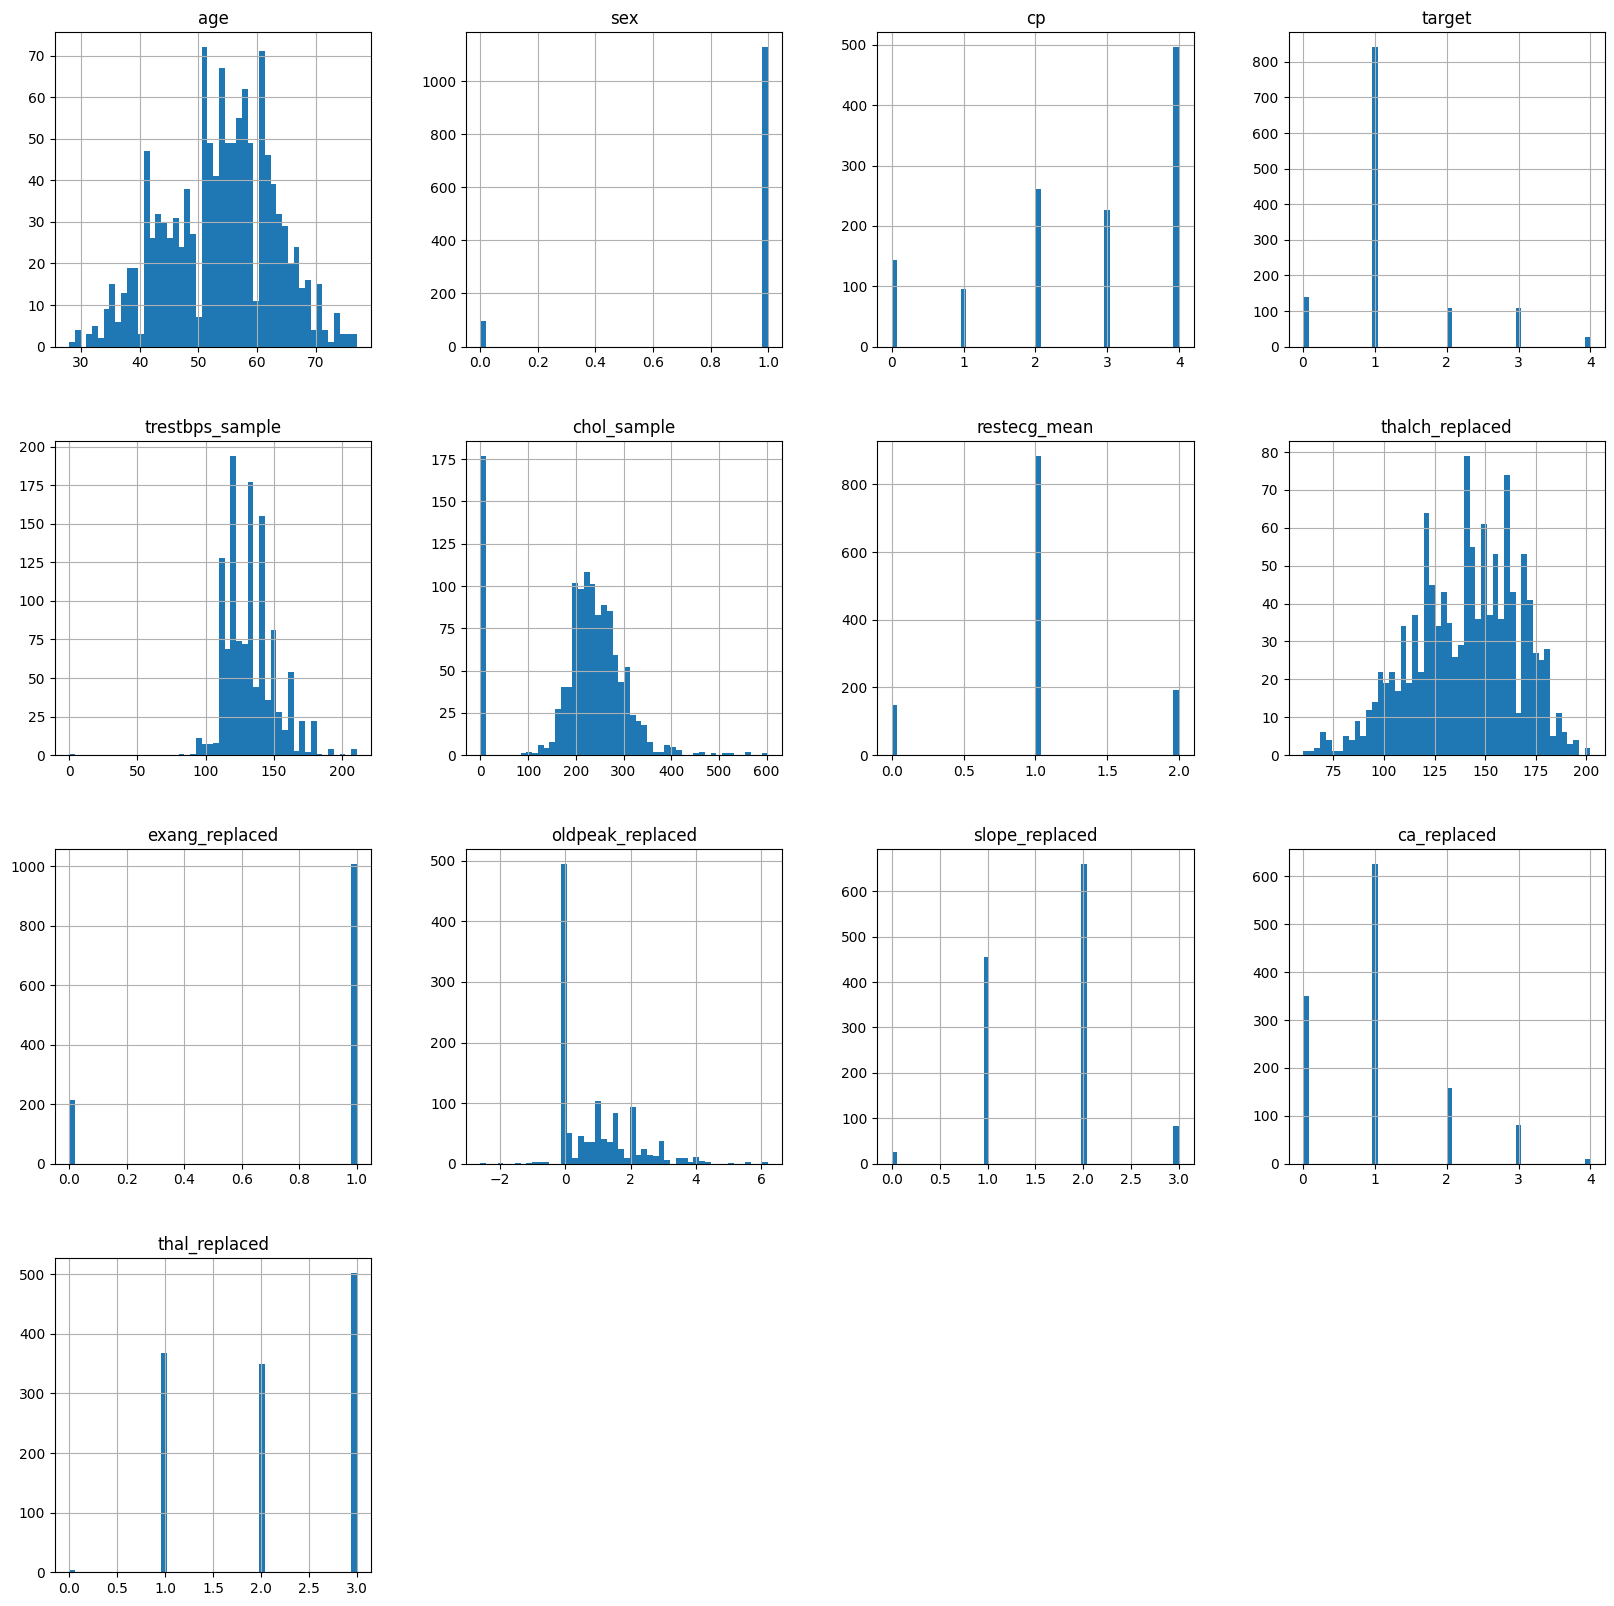

In [39]:
a = df.hist(figsize=(20,20) , bins = 50)

<AxesSubplot:>

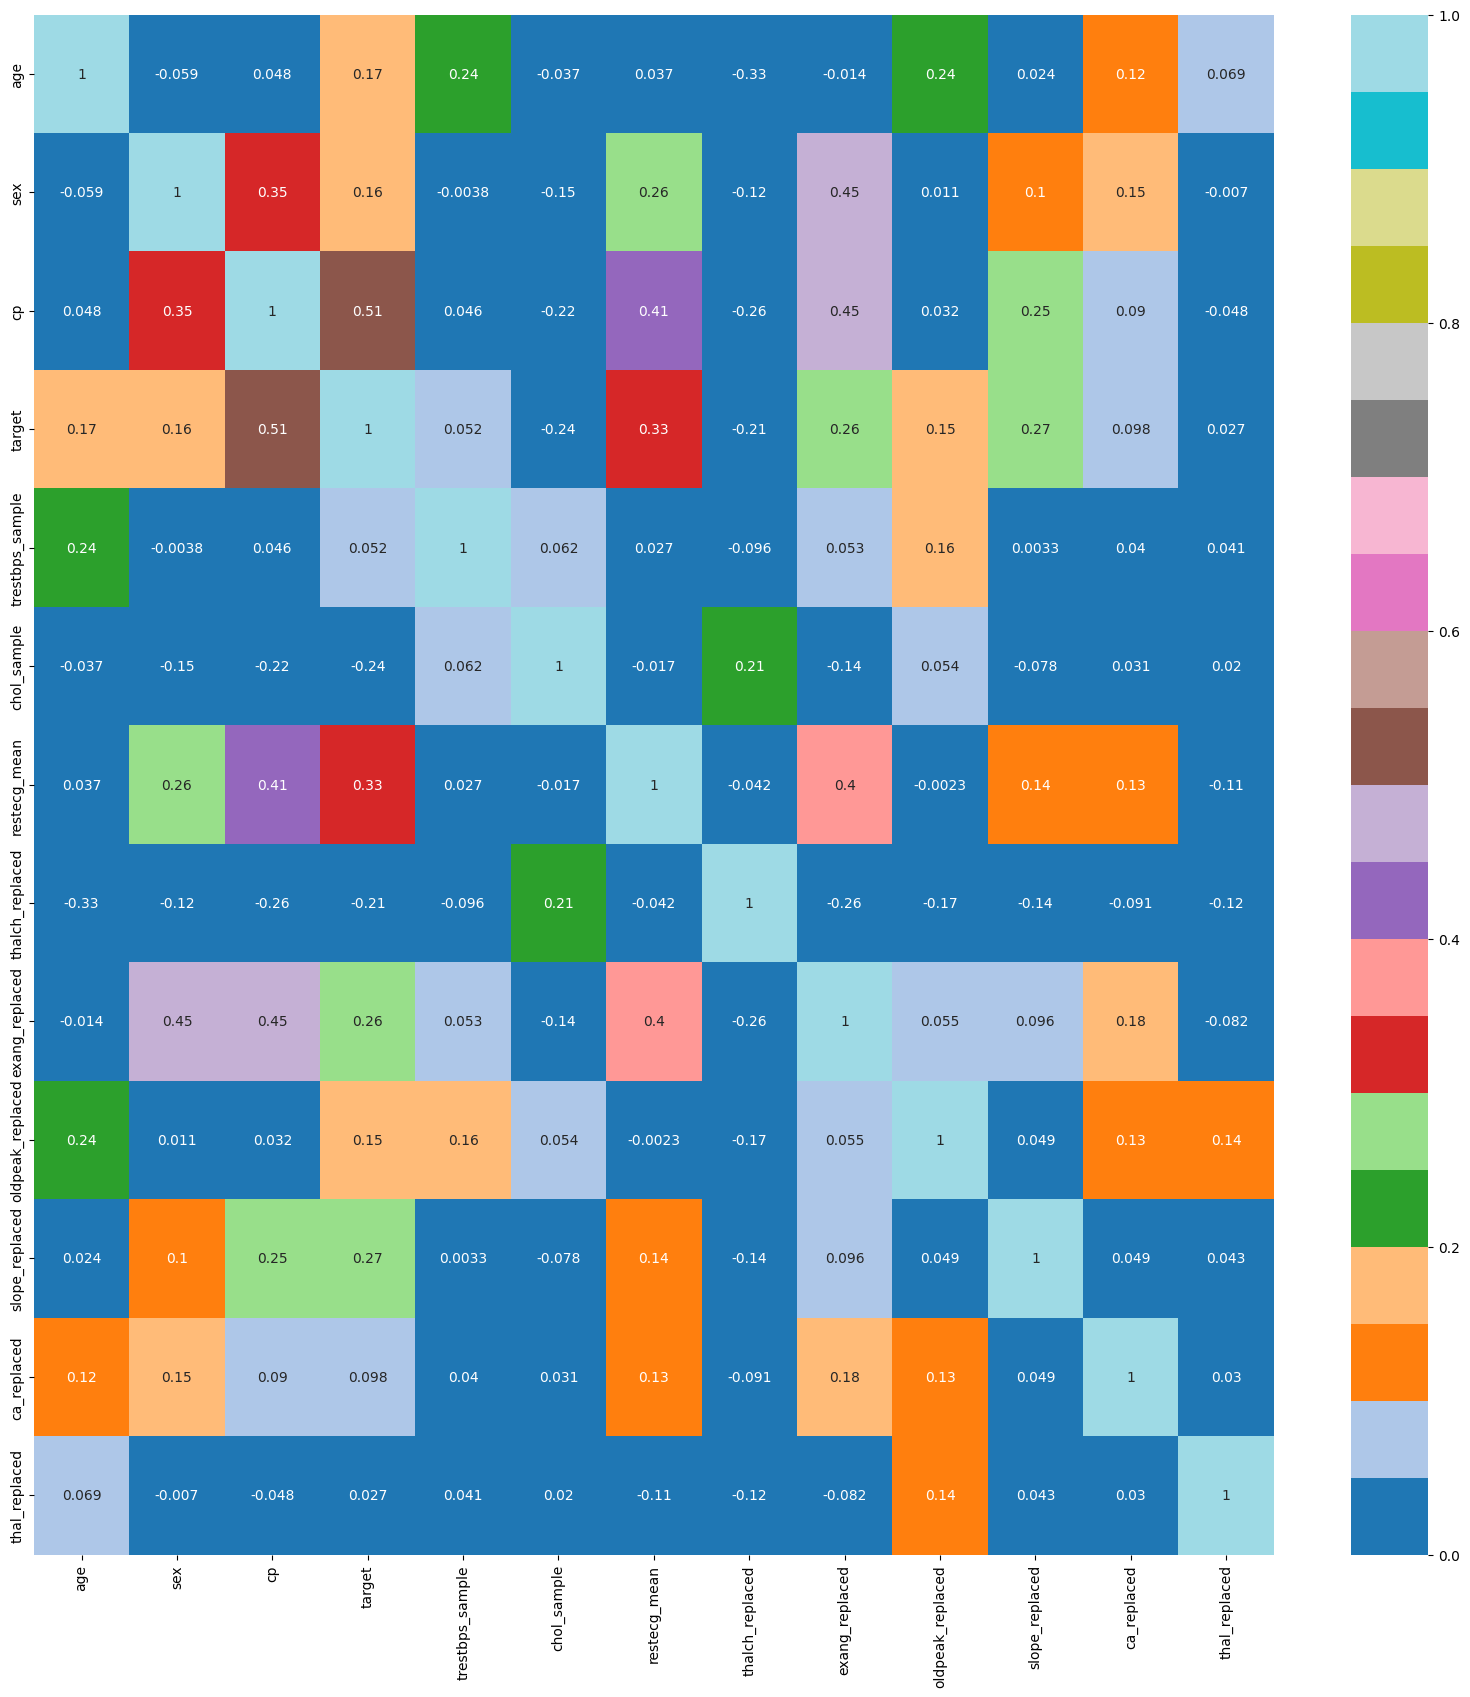

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap = 'tab20',vmin=0,vmax = 1)

In [41]:
y = df['target']

In [42]:
y.head()

0    1
1    2
2    1
3    1
4    1
Name: target, dtype: int64

In [43]:
y.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [44]:
y.value_counts()

1    841
0    138
2    109
3    107
4     28
Name: target, dtype: int64

In [45]:
!pip install stats

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [46]:
from scipy.stats import pearsonr

In [47]:
df = df.drop(['target'] , axis = 1)

In [48]:
df.head()

,age,sex,cp,trestbps_sample,chol_sample,restecg_mean,thalch_replaced,exang_replaced,oldpeak_replaced,slope_replaced,ca_replaced,thal_replaced
0,63,1,1,145.0,233.0,2.0,150.0,1.0,2.3,3.0,1.0,2.0
1,67,1,4,161.0,286.0,2.0,108.0,1.0,1.5,2.0,3.0,1.0
2,67,1,4,121.0,229.0,2.0,129.0,1.0,2.6,2.0,2.0,3.0
3,37,1,3,131.0,250.0,1.0,187.0,1.0,3.5,3.0,1.0,1.0
4,41,1,2,131.0,204.0,2.0,172.0,1.0,1.4,1.0,1.0,1.0


In [49]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps_sample', 'chol_sample', 'restecg_mean',
       'thalch_replaced', 'exang_replaced', 'oldpeak_replaced',
       'slope_replaced', 'ca_replaced', 'thal_replaced'],
      dtype='object')

In [50]:
corr = []

for j in df.columns:
    a = pearsonr(df[j] , y)
    corr.append(a)

In [51]:
corr

[(0.17484216905453234, 7.474646240895988e-10),
 (0.16282507255672354, 1.0242868631517908e-08),
 (0.5109929563293675, 2.6042120590245427e-82),
 (0.05222978490221209, 0.06786108265961267),
 (-0.23981680908368067, 1.854993232561706e-17),
 (0.33098521466676767, 1.1806110699610718e-32),
 (-0.21319805253096066, 4.8831081446947056e-14),
 (0.25583513152986437, 9.953970632501729e-20),
 (0.15149384560856954, 1.019076731014769e-07),
 (0.2694021640291061, 8.844059606235661e-22),
 (0.09796500502873576, 0.0006019665445317421),
 (0.027465767028007595, 0.33719834346448496)]

In [52]:
b = np.array(corr)

In [53]:
b

array([[ 1.74842169e-01,  7.47464624e-10],
       [ 1.62825073e-01,  1.02428686e-08],
       [ 5.10992956e-01,  2.60421206e-82],
       [ 5.22297849e-02,  6.78610827e-02],
       [-2.39816809e-01,  1.85499323e-17],
       [ 3.30985215e-01,  1.18061107e-32],
       [-2.13198053e-01,  4.88310814e-14],
       [ 2.55835132e-01,  9.95397063e-20],
       [ 1.51493846e-01,  1.01907673e-07],
       [ 2.69402164e-01,  8.84405961e-22],
       [ 9.79650050e-02,  6.01966545e-04],
       [ 2.74657670e-02,  3.37198343e-01]])

In [54]:
p_value = pd.Series(b[:,1] , index=df.columns)

In [55]:
p_value.sort_values(ascending=False , inplace=True)

<AxesSubplot:>

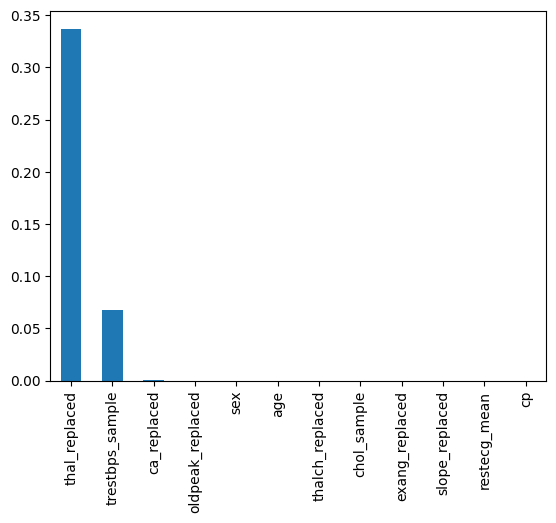

In [56]:
p_value.plot.bar()

In [57]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps_sample', 'chol_sample', 'restecg_mean',
       'thalch_replaced', 'exang_replaced', 'oldpeak_replaced',
       'slope_replaced', 'ca_replaced', 'thal_replaced'],
      dtype='object')

In [58]:
df = df.drop(['thal_replaced','trestbps_sample'] , axis=1)

In [59]:
df.head()

,age,sex,cp,chol_sample,restecg_mean,thalch_replaced,exang_replaced,oldpeak_replaced,slope_replaced,ca_replaced
0,63,1,1,233.0,2.0,150.0,1.0,2.3,3.0,1.0
1,67,1,4,286.0,2.0,108.0,1.0,1.5,2.0,3.0
2,67,1,4,229.0,2.0,129.0,1.0,2.6,2.0,2.0
3,37,1,3,250.0,1.0,187.0,1.0,3.5,3.0,1.0
4,41,1,2,204.0,2.0,172.0,1.0,1.4,1.0,1.0


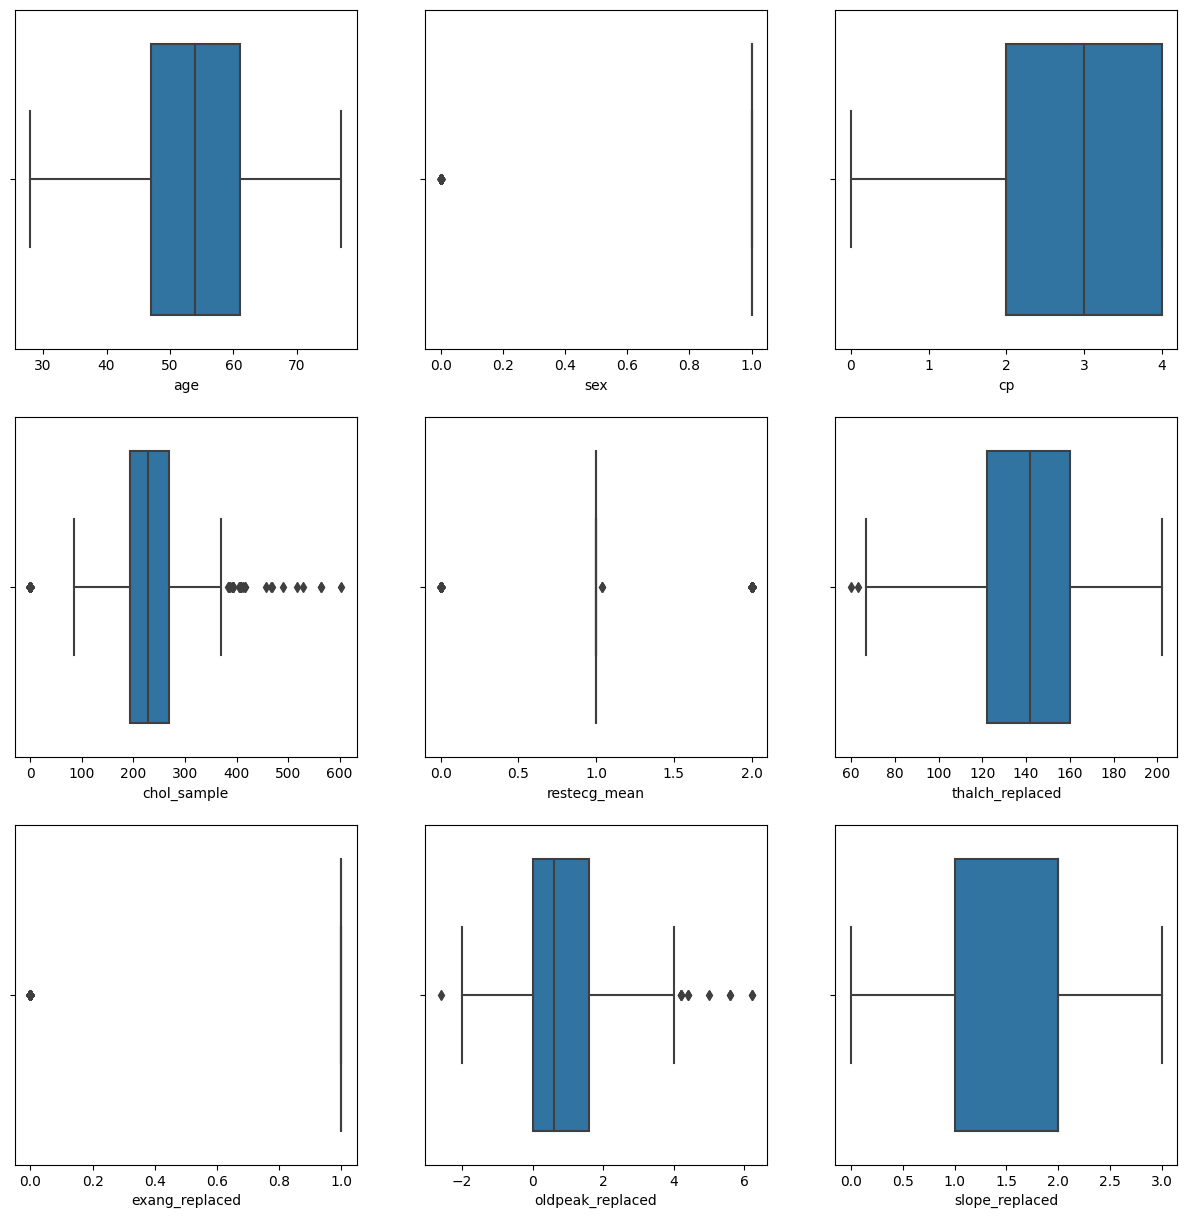

In [60]:
fig , ax = plt.subplots(3,3,figsize = (15,15))
for k , subplot  in zip(df.columns,ax.flatten()):
    sns.boxplot(df[k],ax = subplot)

In [61]:
X = df

In [62]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [63]:
X_train.head()

,age,sex,cp,chol_sample,restecg_mean,thalch_replaced,exang_replaced,oldpeak_replaced,slope_replaced,ca_replaced
451,54,1,2,208.0,1.0,142.0,1.0,0.0,2.0,3.0
931,48,0,2,275.0,1.0,139.0,0.0,0.2,2.0,0.0
816,35,1,3,161.0,1.0,156.0,0.0,0.5,2.0,2.0
575,56,1,4,230.0,1.0,124.0,1.0,1.5,2.0,1.0
585,47,1,4,205.0,1.0,98.0,1.0,2.0,2.0,2.0


In [64]:
y_train

451     1
931     1
816     1
575     1
585     1
       ..
1044    1
1095    0
1130    0
860     1
1126    0
Name: target, Length: 819, dtype: int64

In [65]:
X_test.head()

,age,sex,cp,chol_sample,restecg_mean,thalch_replaced,exang_replaced,oldpeak_replaced,slope_replaced,ca_replaced
661,57,1,4,0.0,1.0,131.0,1.0,1.4,1.0,1.0
220,41,1,3,268.0,2.0,172.0,1.0,0.0,1.0,1.0
155,71,1,4,322.0,2.0,109.0,1.0,2.4,2.0,3.0
677,61,1,4,0.0,1.0,63.0,1.0,0.5,1.0,2.0
910,51,1,4,258.0,2.0,96.0,1.0,1.0,1.0,1.0


In [66]:
y_test.head()

661    3
220    1
155    1
677    3
910    1
Name: target, dtype: int64

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [68]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [69]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [70]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [71]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

In [72]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [73]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    #print("Naive:\n")
    #naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)

In [74]:
print_score(X_train, X_test, y_train, y_test)

SVM:

Train score : 0.6788766788766789
Test score : 0.7054455445544554
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.7203907203907204
Test score : 0.655940594059406
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 0.650990099009901
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.7821782178217822


In [75]:
random = RandomForestClassifier(criterion = 'entropy')
random.fit(X_train, y_train)
y_pred1 = random.predict(X_test)

cm = confusion_matrix(y_test, y_pred1)
cm

array([[ 36,   8,   0,   0,   0],
       [  5, 265,   7,   8,   0],
       [  0,  27,   5,   3,   0],
       [  0,  20,   5,   7,   0],
       [  0,   6,   1,   1,   0]], dtype=int64)

In [76]:

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        44
           1       0.81      0.93      0.87       285
           2       0.28      0.14      0.19        35
           3       0.37      0.22      0.27        32
           4       0.00      0.00      0.00         8

    accuracy                           0.77       404
   macro avg       0.47      0.42      0.44       404
weighted avg       0.72      0.77      0.74       404



In [77]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [80]:
grid_search = GridSearchCV(estimator = random,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.7411924119241192
best_parameters =  {'criterion': 'gini', 'max_depth': 25, 'n_estimators': 50}


In [81]:
classifier_forest1 = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 25)
classifier_forest1.fit(X_train, y_train)
y_pred2 = classifier_forest1.predict(X_test)

cm = confusion_matrix(y_test, y_pred2)
cm

array([[ 33,  11,   0,   0,   0],
       [  6, 264,   9,   6,   0],
       [  0,  30,   4,   1,   0],
       [  0,  18,   6,   8,   0],
       [  0,   5,   1,   2,   0]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80        44
           1       0.80      0.93      0.86       285
           2       0.20      0.11      0.15        35
           3       0.47      0.25      0.33        32
           4       0.00      0.00      0.00         8

    accuracy                           0.76       404
   macro avg       0.46      0.41      0.43       404
weighted avg       0.71      0.76      0.73       404



In [83]:
X.columns

Index(['age', 'sex', 'cp', 'chol_sample', 'restecg_mean', 'thalch_replaced',
       'exang_replaced', 'oldpeak_replaced', 'slope_replaced', 'ca_replaced'],
      dtype='object')

In [84]:
classifier_forest1.predict([['11','0','12','13','6.7','90','2','87','76','9']])

array([3], dtype=int64)

In [85]:
import pickle 

In [86]:
with open('heart.pkl' , 'wb') as f:
    pickle.dump(classifier_forest1 , f)

In [87]:
model = pickle.load(open('heart.pkl' , 'rb'))

In [88]:
model.predict([['11','0','12','13','6.7','90','2','87','76','9']])[0]

3